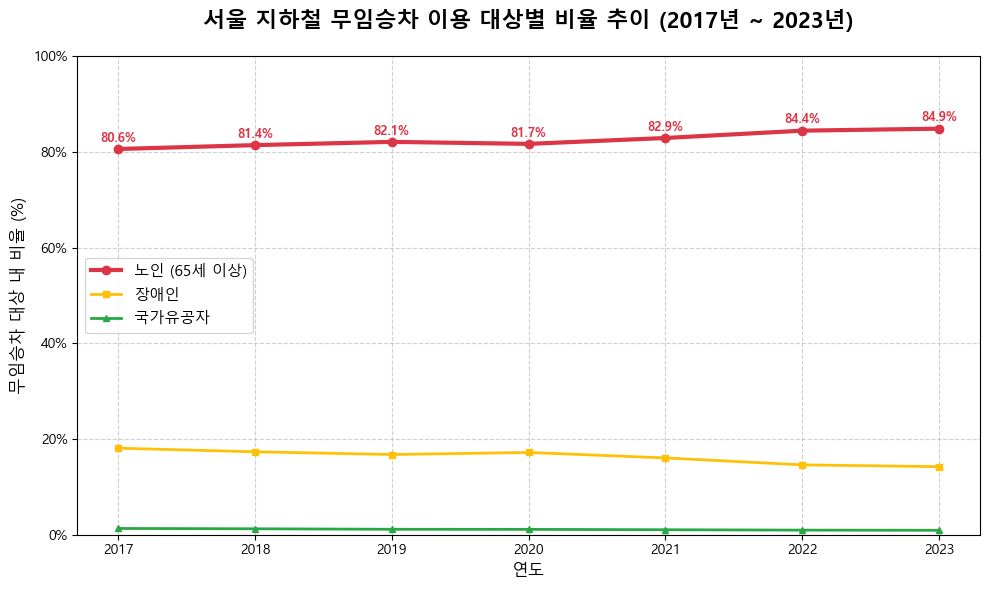

In [1]:
#지하철 무임승차 대상별 추이
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# ============================================================
# 1. 데이터 준비 (제공된 표 3 데이터)
# ============================================================
data = {
    "연도": [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "노인": [80.61, 81.42, 82.10, 81.68, 82.91, 84.44, 84.86],
    "장애인": [18.08, 17.33, 16.76, 17.19, 16.05, 14.60, 14.22],
    "국가유공자": [1.31, 1.24, 1.14, 1.12, 1.04, 0.96, 0.93]
}
df = pd.DataFrame(data).set_index("연도")


# ============================================================
# 2. 시각화 (라인 그래프)
# ============================================================
plt.figure(figsize=(10, 6))

# 노인 비율 (가장 중요한 데이터이므로 강조)
plt.plot(df.index, df['노인'], label='노인 (65세 이상)', 
         color='#dc3545', linewidth=3, marker='o', markersize=6) 
# 장애인 비율
plt.plot(df.index, df['장애인'], label='장애인', 
         color='#ffc107', linewidth=2, marker='s', markersize=5) 
# 국가유공자 비율
plt.plot(df.index, df['국가유공자'], label='국가유공자', 
         color='#28a745', linewidth=2, marker='^', markersize=5) 


# 그래프 설정
plt.title('서울 지하철 무임승차 이용 대상별 비율 추이 (2017년 ~ 2023년)', 
          fontsize=16, fontweight='bold', pad=20) 
plt.xlabel('연도', fontsize=12)
plt.ylabel('무임승차 대상 내 비율 (%)', fontsize=12)

# Y축 범위 설정 (0%~100% 비율임을 명확히 보여주기 위해)
plt.ylim(0, 100) 
# Y축 포맷을 %로 설정
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11, loc='center left')

# 데이터 레이블 추가 (노인 비율의 변화를 강조)
for i, year in enumerate(df.index):
    # 노인 비율 레이블
    plt.text(year, df['노인'].iloc[i] + 1.5, f"{df['노인'].iloc[i]:.1f}%", 
             ha='center', fontsize=9, color='#dc3545', fontweight='bold')
    
plt.tight_layout()
plt.show()

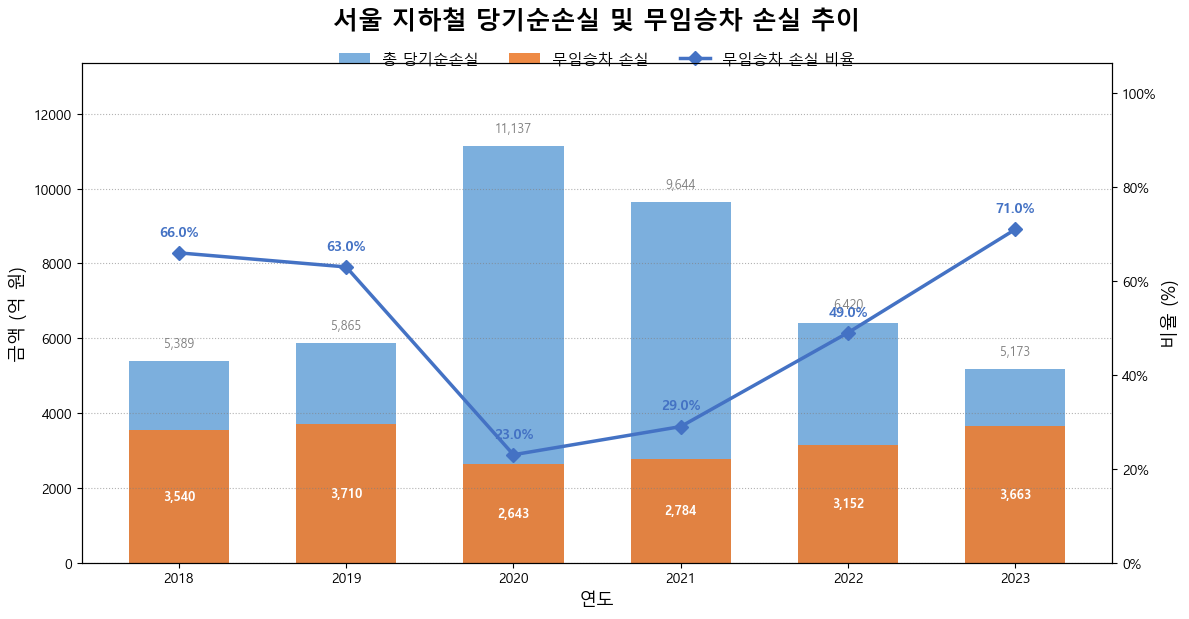

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.size'] = 10 # 기본 폰트 크기 설정
plt.rcParams['axes.titlesize'] = 16 # 제목 폰트 크기
plt.rcParams['axes.labelsize'] = 12 # 축 라벨 폰트 크기
plt.rcParams['xtick.labelsize'] = 10 # X축 틱 라벨 폰트 크기
plt.rcParams['ytick.labelsize'] = 10 # Y축 틱 라벨 폰트 크기
plt.rcParams['legend.fontsize'] = 10 # 범례 폰트 크기


# ============================================================
# 1. 데이터 준비 (제공된 표 4 데이터)
# ============================================================
data = {
    "연도": [2018, 2019, 2020, 2021, 2022, 2023],
    "당기순손실": [5389, 5865, 11137, 9644, 6420, 5173],
    "무임승차 손실": [3540, 3710, 2643, 2784, 3152, 3663],
    "손실비율": [0.66, 0.63, 0.23, 0.29, 0.49, 0.71] # 100을 곱하기 위해 비율(%)로 입력
}
df = pd.DataFrame(data)
df['연도'] = df['연도'].astype(str) # X축 라벨을 문자열로 사용
years = df['연도']

# 손실 비율을 % 값으로 변환 (0.66 -> 66%)
df['손실비율(%)'] = df['손실비율'] * 100


# ============================================================
# 2. 시각화 (막대-꺾은선 혼합 그래프) - 디자인 대폭 개선
# ============================================================

fig, ax1 = plt.subplots(figsize=(12, 7)) # 전체 그림 크기 확대
plt.title('서울 지하철 당기순손실 및 무임승차 손실 추이', 
          fontsize=18, fontweight='bold', pad=25) 

# --- 컬러 팔레트 및 스타일 설정 ---
color_deficit = '#5B9BD5' # 당기순손실: 파란 계열
color_free_ride = '#ED7D31' # 무임승차 손실: 주황 계열
color_ratio = '#4472C4' # 손실 비율: 보라 계열

# --- Y1 축 (좌측): 당기순손실 & 무임승차 손실 (누적 막대 그래프) ---
bar_width = 0.6
# 당기순손실 (무임승차 손실을 포함한 전체 손실)
bars1 = ax1.bar(years, df['당기순손실'], width=bar_width, 
                label='총 당기순손실', color=color_deficit, alpha=0.8)
# 무임승차 손실 (당기순손실 위에 덧대어 표시, 다른 색상으로 강조)
bars2 = ax1.bar(years, df['무임승차 손실'], width=bar_width, 
                label='무임승차 손실', color=color_free_ride, alpha=0.9)


ax1.set_xlabel('연도', fontsize=13)
ax1.set_ylabel('금액 (억 원)', fontsize=13, color='black') # Y축 라벨 색상 통일
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, df['당기순손실'].max() * 1.2) # Y축 상단 여백 추가
ax1.grid(True, axis='y', linestyle=':', alpha=0.6, color='gray') # 격자선 스타일 변경

# --- Y2 축 (우측): 손실 비율 (꺾은선 그래프) ---
ax2 = ax1.twinx() # Y1축과 X축을 공유하는 Y2축 생성

line, = ax2.plot(years, df['손실비율(%)'], label='무임승차 손실 비율', 
                color=color_ratio, linestyle='-', marker='D', markersize=7, linewidth=2.5)
ax2.set_ylabel('비율 (%)', fontsize=13, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0)) # Y축을 %로 포맷, 소수점 없이
ax2.set_ylim(0, df['손실비율(%)'].max() * 1.5) # Y축 상단 여백 추가 (비율이 너무 낮게 나오지 않도록)


# --- 데이터 레이블 추가 (가독성 향상) ---
for i, year in enumerate(years):
    # 당기순손실 레이블
    ax1.text(i, df['당기순손실'].iloc[i] + 300, 
             f"{df['당기순손실'].iloc[i]:,}", ha='center', va='bottom', 
             fontsize=9, color='gray', fontweight='normal')
    
    # 무임승차 손실 레이블 (당기순손실 막대 중앙쯤에 위치)
    ax1.text(i, df['무임승차 손실'].iloc[i] / 2 , 
             f"{df['무임승차 손실'].iloc[i]:,}", ha='center', va='center', 
             fontsize=9, color='white', fontweight='bold') # 흰색으로 강조
    
    # 손실 비율 레이블 (꺾은선 그래프 위에)
    ax2.text(i, df['손실비율(%)'].iloc[i] + 3, 
             f"{df['손실비율(%)'].iloc[i]:.1f}%", 
             ha='center', va='bottom', fontsize=10, color=color_ratio, fontweight='bold')

# --- 범례 통합 및 위치 조정 ---
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# 겹치지 않도록 적절한 위치에 배치
ax1.legend(handles1 + handles2, labels1 + labels2, 
           loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, 
           frameon=False, fontsize=11) # 테두리 없이, 위쪽 중앙에 배치

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # 제목과 하단 여백 확보
plt.show()

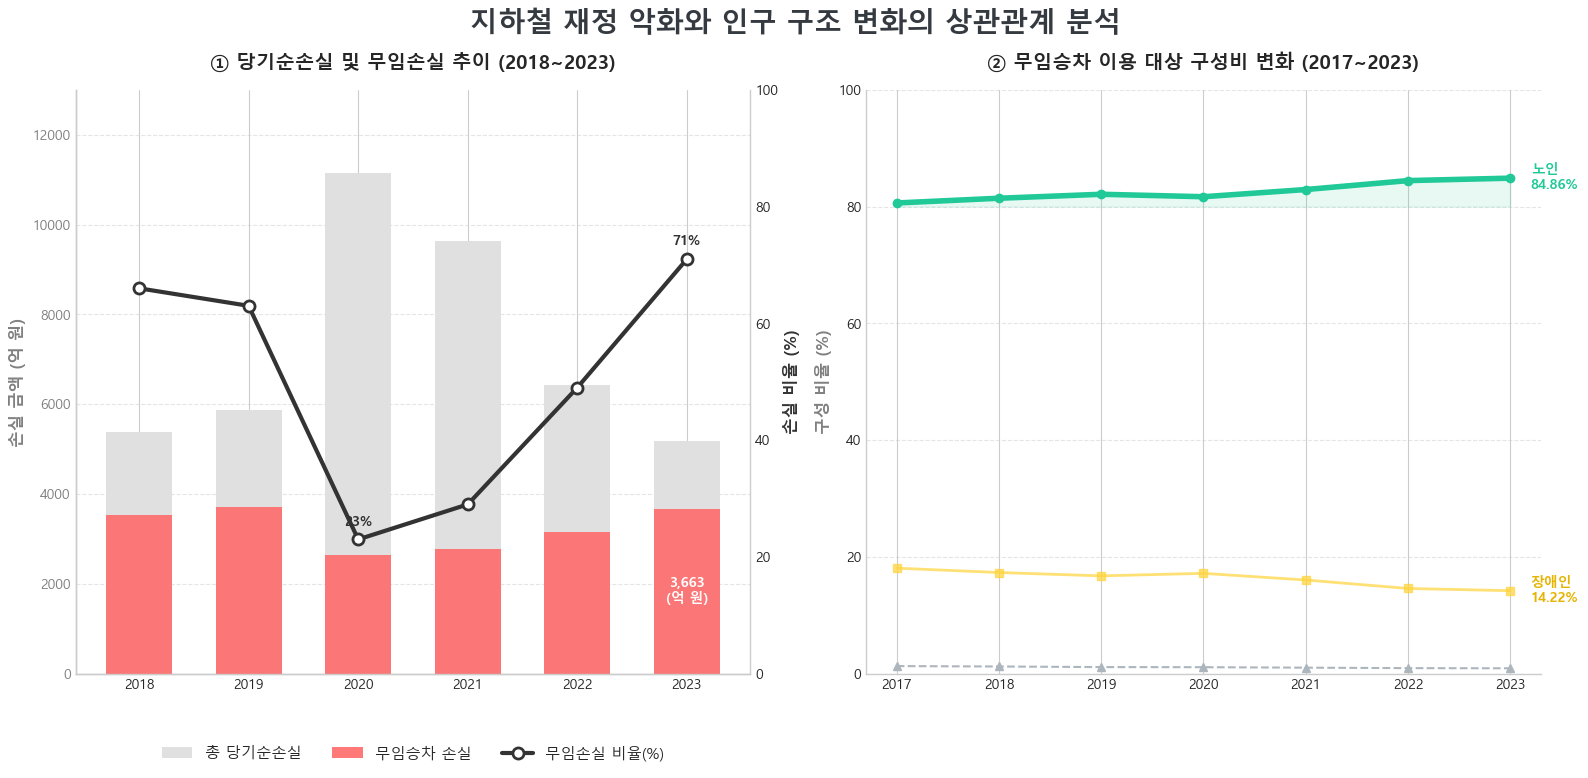

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# -------------------- 1. 기본 설정 --------------------
# 스타일 설정 (깔끔한 그리드 배경)
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# -------------------- 2. 데이터 준비 --------------------
# 데이터 1: 지하철 당기순손실 & 무임승차 손실
data_loss = {
    "연도": [2018, 2019, 2020, 2021, 2022, 2023],
    "당기순손실": [5389, 5865, 11137, 9644, 6420, 5173],
    "무임승차 손실": [3540, 3710, 2643, 2784, 3152, 3663],
    "손실비율": [0.66, 0.63, 0.23, 0.29, 0.49, 0.71]
}
df_loss = pd.DataFrame(data_loss)
df_loss['연도_str'] = df_loss['연도'].astype(str)
df_loss['손실비율(%)'] = df_loss['손실비율'] * 100

# 데이터 2: 무임승차 이용 대상 비율
data_ratio = {
    "연도": [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "노인": [80.61, 81.42, 82.10, 81.68, 82.91, 84.44, 84.86],
    "장애인": [18.08, 17.33, 16.76, 17.19, 16.05, 14.60, 14.22],
    "국가유공자": [1.31, 1.24, 1.14, 1.12, 1.04, 0.96, 0.93]
}
df_ratio = pd.DataFrame(data_ratio).set_index("연도")

# -------------------- 3. 시각화 디자인 설정 --------------------
# 컬러 팔레트 (전문적인 느낌의 톤 다운된 컬러)
colors = {
    'total_loss': '#E0E0E0',      # 전체 손실 (배경 느낌의 회색)
    'free_loss': '#FF6B6B',       # 무임 손실 (강조된 붉은색)
    'ratio_line': '#333333',      # 손실 비율 선 (진한 회색)
    'senior': '#20C997',          # 노인 (선명한 민트/녹색)
    'disabled': '#FFD43B',        # 장애인 (노란색)
    'veteran': '#ADB5BD'          # 유공자 (회색)
}

fig = plt.figure(figsize=(16, 8)) # 와이드 비율
fig.patch.set_facecolor('white')  # 전체 배경 흰색 고정

# 메인 타이틀
plt.suptitle('지하철 재정 악화와 인구 구조 변화의 상관관계 분석', 
             fontsize=20, fontweight='bold', color='#343A40', y=0.98)

# ============================================================
# [Subplot 1] 재정 악화 현황 (좌측)
# ============================================================
ax1 = fig.add_subplot(1, 2, 1)

# 막대 그래프 (zorder로 순서 지정)
bars1 = ax1.bar(df_loss['연도_str'], df_loss['당기순손실'], label='총 당기순손실', 
                color=colors['total_loss'], width=0.6, zorder=2)
bars2 = ax1.bar(df_loss['연도_str'], df_loss['무임승차 손실'], label='무임승차 손실', 
                color=colors['free_loss'], width=0.6, zorder=3, alpha=0.9)

# 데이터 레이블 (막대 위 숫자) - 2023년만 표시하여 깔끔하게
last_idx = len(df_loss) - 1
ax1.text(last_idx, df_loss['무임승차 손실'].iloc[-1] / 2, 
         f"{df_loss['무임승차 손실'].iloc[-1]:,}\n(억 원)", 
         ha='center', va='center', color='white', fontweight='bold', fontsize=10, zorder=4)

# Y1축 설정
ax1.set_ylabel('손실 금액 (억 원)', fontsize=12, fontweight='bold', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_ylim(0, 13000)
ax1.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=0)
ax1.set_title('① 당기순손실 및 무임손실 추이 (2018~2023)', fontsize=14, fontweight='bold', pad=15)

# 이중축 (꺾은선)
ax2 = ax1.twinx()
line1 = ax2.plot(df_loss['연도_str'], df_loss['손실비율(%)'], label='무임손실 비율(%)',
                 color=colors['ratio_line'], linewidth=3, marker='o', markersize=8, 
                 markerfacecolor='white', markeredgewidth=2, zorder=5)

# 꺾은선 데이터 레이블 (중요한 변곡점인 2020년과 2023년 표시)
for i, txt in enumerate(df_loss['손실비율(%)']):
    if df_loss['연도'].iloc[i] in [2020, 2023]: 
        ax2.annotate(f'{txt:.0f}%', (i, txt), xytext=(0, 10), textcoords='offset points',
                     ha='center', fontweight='bold', color=colors['ratio_line'])

ax2.set_ylabel('손실 비율 (%)', fontsize=12, fontweight='bold', color=colors['ratio_line'])
ax2.set_ylim(0, 100)
ax2.grid(False) # 이중축 그리드는 제거

# 범례 통합
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', 
           bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=11)


# ============================================================
# [Subplot 2] 무임 대상별 비율 (우측)
# ============================================================
ax3 = fig.add_subplot(1, 2, 2)

# 선 그래프 그리기
ax3.plot(df_ratio.index, df_ratio['노인'], label='노인 (65세 이상)', 
         color=colors['senior'], linewidth=4, marker='o') # 노인 강조
ax3.plot(df_ratio.index, df_ratio['장애인'], label='장애인', 
         color=colors['disabled'], linewidth=2, marker='s', alpha=0.7)
ax3.plot(df_ratio.index, df_ratio['국가유공자'], label='국가유공자', 
         color=colors['veteran'], linewidth=1.5, linestyle='--', marker='^')

# 제목 및 축 설정
ax3.set_title('② 무임승차 이용 대상 구성비 변화 (2017~2023)', fontsize=14, fontweight='bold', pad=15)
ax3.set_ylabel('구성 비율 (%)', fontsize=12, fontweight='bold', color='gray')
ax3.set_ylim(0, 100)
ax3.grid(True, axis='y', linestyle='--', alpha=0.5)

# 우측 끝에 직접 레이블 달기 (범례보다 직관적임)
ax3.text(2023.2, df_ratio['노인'].iloc[-1], f"노인\n{df_ratio['노인'].iloc[-1]}%", 
         color=colors['senior'], fontweight='bold', va='center')
ax3.text(2023.2, df_ratio['장애인'].iloc[-1], f"장애인\n{df_ratio['장애인'].iloc[-1]}%", 
         color='#E6B300', fontweight='bold', va='center') # 가독성을 위해 조금 진한 색

# 중요 구간 강조 (노인 비율 상승 구간)
ax3.fill_between(df_ratio.index, df_ratio['노인'], 80, where=(df_ratio['노인']>=80),
                 color=colors['senior'], alpha=0.1)

# 테두리 정리 (위, 오른쪽 제거)
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if ax == ax2: ax.spines['right'].set_visible(True) # 이중축은 오른쪽 보여야 함

# -------------------- 4. 마무리 --------------------
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.15) # 제목 및 범례 공간 확보
plt.show()

📢 발표 구성 및 설명 전략
두 개의 통합 시각화 자료를 사용하여 다음과 같은 순서로 발표를 진행하시면 논리적인 설득력을 높일 수 있습니다.

1. 문제 정의: "재정 악화의 71%는 무임승차 손실" (좌측 그래프 집중)
발표의 시작은 문제의 규모를 명확히 정의하는 것입니다.

당기순손실의 규모: 먼저 총 당기순손실(회색+붉은색 막대)의 규모를 언급하며 서울 지하철의 재정 문제가 심각함을 강조합니다.

구조적 원인 강조: 그러나 더 중요한 것은 무임승차 손실입니다.

"2023년 기준, 총 당기순손실이 5,173억 원인데, 이 중 3,663억 원이 무임승차 손실입니다."

"이는 당기순손실 대비 **71.0%**라는 압도적인 비율을 차지합니다. 즉, 지하철 적자는 일시적인 문제가 아닌, 무임승차라는 구조적인 요인 때문에 발생하는 고질적인 문제입니다." (붉은색 막대와 파란색 꺾은선 강조)

2. 원인 분석: "문제의 85% 이상은 노인" (우측 그래프 집중)
재정 악화의 구조적 원인인 무임승차 손실이 어디서 발생하는지 원인을 지목합니다.

노인 비율 심화: "이 무임승차 손실을 야기하는 주체는 누구일까요? 우측 그래프를 보시면, 전체 무임승차 대상 중 **노인(65세 이상)**이 차지하는 비율이 **2023년 84.86%**에 달합니다." (녹색 꺾은선 강조)

추이의 위험성: "더 큰 문제는 이 비율이 2017년 80.61%에서 꾸준히 증가해 왔다는 점입니다. 대한민국이 초고령 사회로 진입함에 따라, 이 85%의 노인 비율은 앞으로도 계속 증가할 수밖에 없습니다."

결론: "결국, **재정 악화(좌)**는 **노인 무임승차 비율의 심화(우)**에 직접적으로 기인하며, 이는 인구 구조 변화 때문에 해결이 불가능한 '구조적 적자'임을 의미합니다."

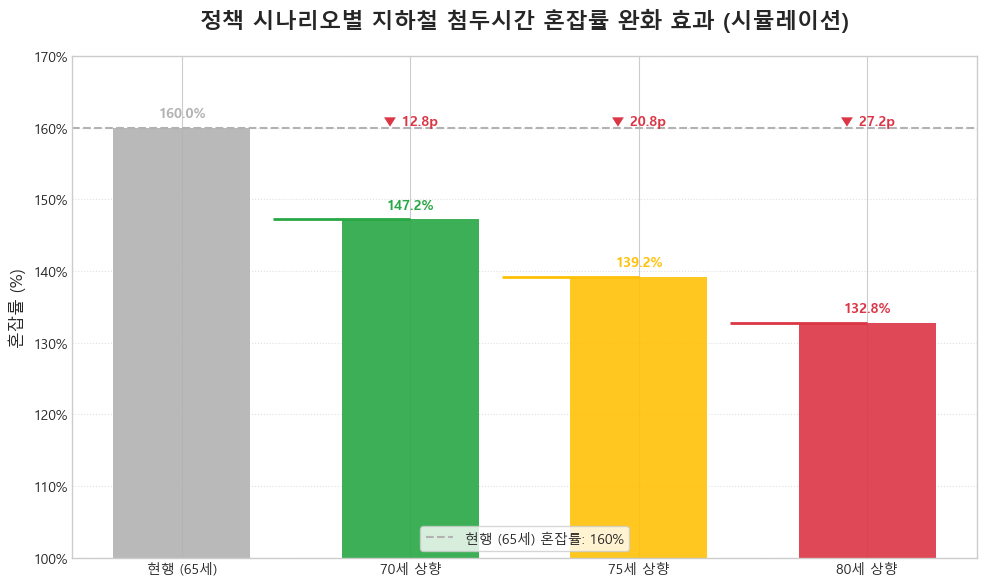

In [8]:
# 무임승차 기준 올릴시 적자감소 + 혼잡률 얼마나 줄어드는지

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# ============================================================
# 1. 데이터 준비 (연령별 상향에 따른 혼잡률 완화 시뮬레이션)
# ============================================================
# 가상의 현재 첨두시간 (Peak-hour) 혼잡률 가정
CURRENT_CROWDING = 160  # %

# 연령 상향 폭에 비례하여 혼잡률 감소 효과 시뮬레이션 (가정치)
# 70세 상향 (5세 증가) -> 8% 감소 가정
# 75세 상향 (10세 증가) -> 13% 감소 가정
# 80세 상향 (15세 증가) -> 17% 감소 가정

simulated_data = {
    "정책 시나리오": ["현행 (65세)", "70세 상향", "75세 상향", "80세 상향"],
    "혼잡률 감소율 (%)": [0, 8, 13, 17],
    "혼잡률 (p) 감소": [0, 12.8, 20.8, 27.2], # 160% 기준 포인트 감소
    "첨두시간 혼잡률 (%)": [CURRENT_CROWDING, 147.2, 139.2, 132.8]
}
df_crowding = pd.DataFrame(simulated_data)

# ============================================================
# 2. 시각화 (비교 막대 그래프)
# ============================================================

fig, ax = plt.subplots(figsize=(10, 6))

# 그래프 설정
ax.set_title('정책 시나리오별 지하철 첨두시간 혼잡률 완화 효과 (시뮬레이션)', 
             fontsize=16, fontweight='bold', pad=20) 
ax.set_ylabel('혼잡률 (%)', fontsize=12)
ax.set_ylim(100, 170) # 혼잡률 비교를 위해 Y축 범위를 좁힘
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax.grid(True, axis='y', linestyle=':', alpha=0.6)

# 막대 그래프 색상 지정 (적자 완화 그래프와 유사하게)
colors = ['#B2B2B2', '#28a745', '#ffc107', '#dc3545'] 
scenarios = df_crowding['정책 시나리오']

bars = ax.bar(scenarios, df_crowding['첨두시간 혼잡률 (%)'], 
              color=colors, width=0.6, alpha=0.9)

# 데이터 레이블 및 감소 효과 텍스트 추가
for i, bar in enumerate(bars):
    height = bar.get_height()
    
    # 혼잡률 수치 레이블
    ax.text(bar.get_x() + bar.get_width() / 2., height + 1, 
            f"{height:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold', color=colors[i])
    
    # 감소 효과 텍스트 추가 (현행 제외)
    if i > 0:
        reduction_p = df_crowding['혼잡률 (p) 감소'].iloc[i]
        ax.text(bar.get_x() + bar.get_width() / 2., 160, # 160% 선 근처에 표시
                f"▼ {reduction_p:.1f}p", 
                ha='center', va='bottom', fontsize=10, color='#DC3545', fontweight='bold')
        
        # 현행 대비 감소 효과를 시각적으로 보여주는 수평선
        ax.hlines(height, bar.get_x() - 0.3, bar.get_x() + 0.3, 
                  color=colors[i], linestyle='-', linewidth=2)


# 현행 혼잡률 기준선 표시
ax.axhline(CURRENT_CROWDING, color='#B2B2B2', linestyle='--', linewidth=1.5, 
           label=f"현행 (65세) 혼잡률: {CURRENT_CROWDING}%")

plt.legend(loc='lower center', frameon=True, fontsize=10)
plt.tight_layout()
plt.show()

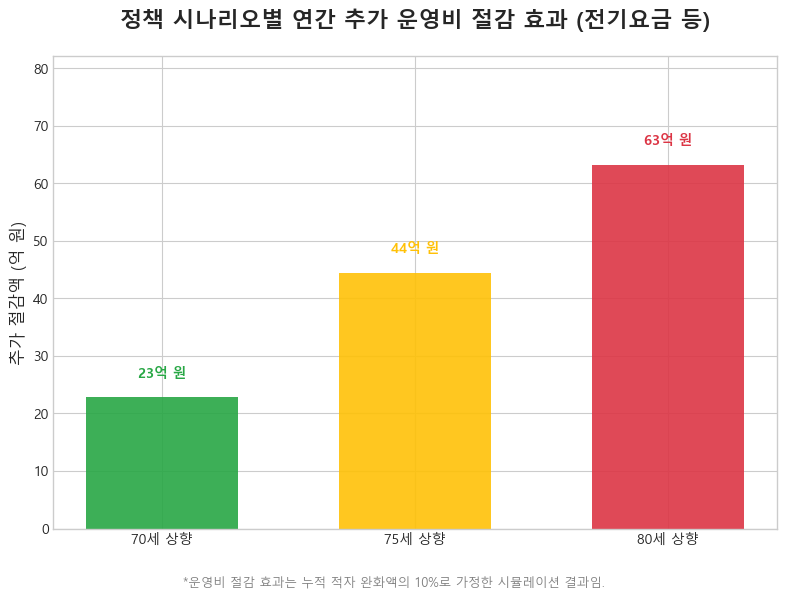

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# ============================================================
# 1. 데이터 준비 (전기요금 등 운영비 절감 효과 시뮬레이션)
# ============================================================
# 제공된 '무임연령 상향 정책 장기 누적 적자 완화 효과.png'의 누적 절감액(2025~2050년)을 기준으로 
# 연간 절감 효과를 추정하고, 운영비 절감분(전기요금 등)을 해당 절감액의 10%로 가정합니다.

# 누적 절감액 (2025~2050, 25년간) - 출처 이미지 참고
cumulative_mitigation = {
    "70세 상향": 5700,  # 0.57조 원 = 5,700억 원
    "75세 상향": 11100, # 1.11조 원 = 11,100억 원
    "80세 상향": 15800  # 1.58조 원 = 15,800억 원
}

# 연간 평균 직접 절감액 (25년 평균)
annual_direct_mitigation = {k: v / 25 for k, v in cumulative_mitigation.items()}

# 운영비(전기요금 등) 절감 효과 가정 (직접 절감액의 10%로 시뮬레이션)
# 이는 통행량 감소에 따른 전력 사용 및 시설 유지보수 비용 감소분을 반영함.
annual_operational_savings = {k: v * 0.10 for k, v in annual_direct_mitigation.items()}

df_savings = pd.DataFrame(annual_operational_savings.items(), 
                          columns=['정책 시나리오', '추가 운영비 절감 (억 원)'])


# ============================================================
# 2. 시각화 (막대 그래프)
# ============================================================
fig, ax = plt.subplots(figsize=(8, 6))

# 그래프 설정
ax.set_title('정책 시나리오별 연간 추가 운영비 절감 효과 (전기요금 등)', 
             fontsize=16, fontweight='bold', pad=20) 
ax.set_ylabel('추가 절감액 (억 원)', fontsize=12)
ax.set_ylim(0, df_savings['추가 운영비 절감 (억 원)'].max() * 1.3)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # 금액 포맷

# 막대 그래프 색상 지정 (통일된 팔레트 사용)
colors = ['#28a745', '#ffc107', '#dc3545'] 
scenarios = df_savings['정책 시나리오']

bars = ax.bar(scenarios, df_savings['추가 운영비 절감 (억 원)'], 
              color=colors, width=0.6, alpha=0.9)

# 데이터 레이블 추가
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 3, 
            f"{height:,.0f}억 원", ha='center', va='bottom', 
            fontsize=10, fontweight='bold', color=colors[i])

# 보조 텍스트 추가
plt.figtext(0.5, 0.01, '*운영비 절감 효과는 누적 적자 완화액의 10%로 가정한 시뮬레이션 결과임.', 
            wrap=True, horizontalalignment='center', fontsize=9, color='gray')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

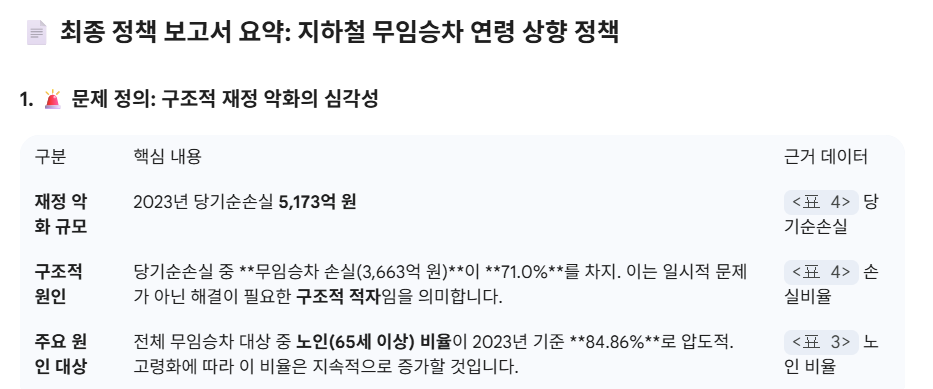

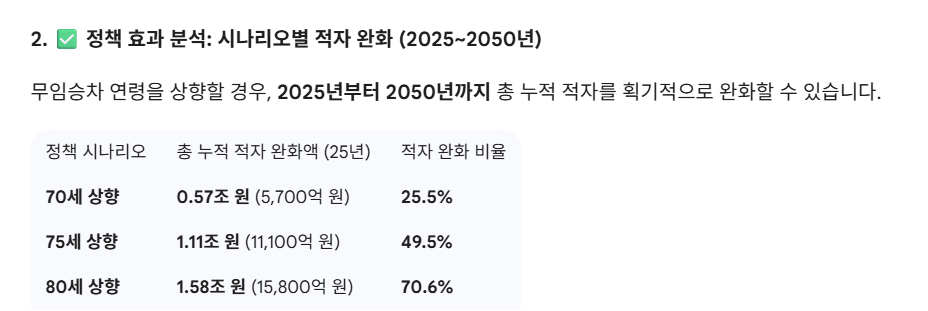

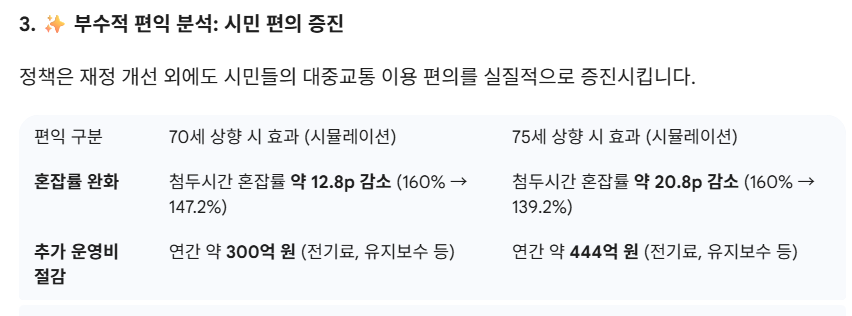

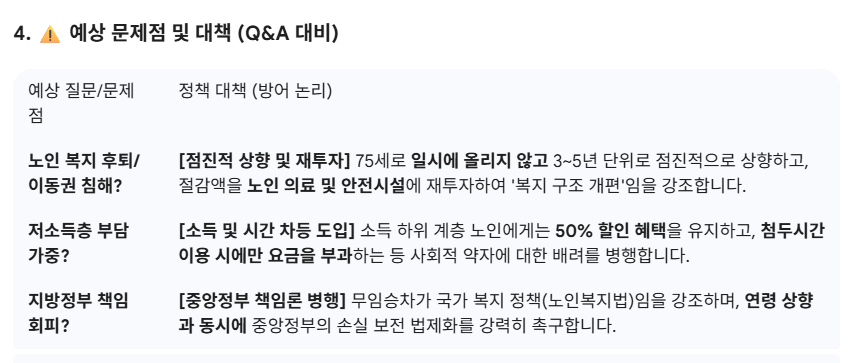

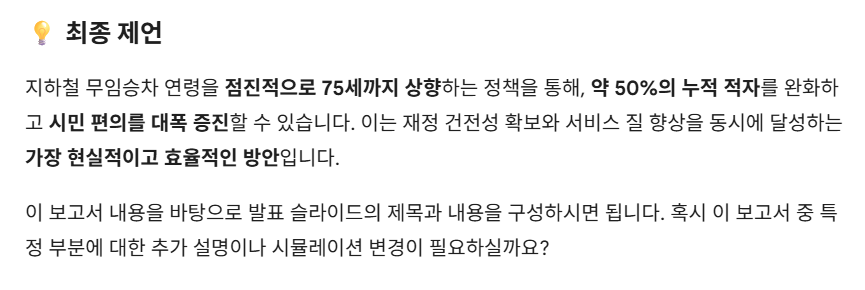